# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [151]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [152]:
assets = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA']
long_term_start = "2015-01-01"
long_term_end = "2024-01-01"
medium_term_start = "2020-01-01"
medium_term_end = "2024-01-01"

In [153]:
long_term_data = yf.download(assets, start=long_term_start, end=long_term_end, auto_adjust=False)['Adj Close']

long_term_data = long_term_data.ffill().bfill()

print("Long Term Data:")
print(long_term_data.describe())

[*********************100%***********************]  6 of 6 completed

Long Term Data:
Ticker         AAPL         AMZN         GOOG         MSFT         NVDA  \
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean      81.394710    91.950540    73.063479   154.516908    11.101311   
std       55.990880    48.654536    36.298158    99.658478    11.961935   
min       20.604078    14.347500    24.377237    34.437149     0.459257   
25%       32.814702    44.303625    41.515251    59.182488     2.668013   
50%       51.220842    90.691998    59.376665   127.528816     5.962060   
75%      139.017654   133.230000   104.133976   244.037380    15.909116   
max      196.256561   186.570496   149.587082   377.077911    50.376503   

Ticker         TSLA  
count   2264.000000  
mean     102.886245  
std      110.936400  
min        9.578000  
25%       16.670500  
50%       23.160666  
75%      214.290005  
max      409.970001  


In [154]:
medium_term_data = yf.download(assets, start=medium_term_start, end=medium_term_end, auto_adjust=False)['Adj Close']

medium_term_data = medium_term_data.ffill().bfill()

print("Medium Term Data:")
print(medium_term_data.describe())

[*********************100%***********************]  6 of 6 completed


Medium Term Data:
Ticker         AAPL         AMZN         GOOG         MSFT         NVDA  \
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     138.087083   137.216247   107.730847   254.761908    21.064824   
std       33.389043    27.468805    25.245549    54.935815    11.753440   
min       54.264328    81.820000    52.437710   128.929962     4.891089   
25%      120.509687   114.309002    87.621811   213.318691    13.123501   
50%      142.950020   140.585007   109.824059   251.500092    17.569815   
75%      163.347755   161.190620   130.478901   294.432381    26.501035   
max      196.256577   186.570496   149.587067   377.077789    50.376507   

Ticker         TSLA  
count   1006.000000  
mean     209.126371  
std       85.797682  
min       24.081333  
25%      160.210003  
50%      223.489998  
75%      262.967491  
max      409.970001  


## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

In [155]:
asset = 'GOOG'
asset_data = medium_term_data[[asset]].copy()
asset_data

Ticker,GOOG
Date,
2020-01-02,67.859543
2020-01-03,67.526543
2020-01-06,69.191559
2020-01-07,69.148376
2020-01-08,69.693291
...,...
2023-12-22,141.657547
2023-12-26,141.756821
2023-12-27,140.387054


In [156]:
ret1 = asset_data[asset].diff(periods=1).dropna()
ret5 = asset_data[asset].diff(periods=5).dropna()
ret20 = asset_data[asset].diff(periods=20).dropna()

logret1 = np.log(asset_data[asset]).diff(periods=1).dropna()
logret5 = np.log(asset_data[asset]).diff(periods=5).dropna()
logret20 = np.log(asset_data[asset]).diff(periods=20).dropna()

vol5 = logret1.rolling(5).std().dropna()
vol20 = logret1.rolling(20).std().dropna()
vol60 = logret1.rolling(60).std().dropna()

moving_avg = asset_data[asset].rolling(window=20).mean().dropna()

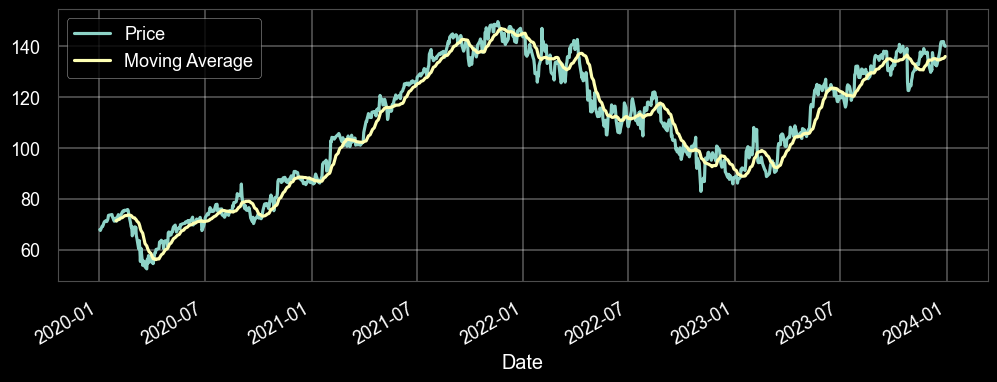

In [157]:
plt.style.use("seaborn-v0_8-talk")
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.alpha"] = 0.3
plt.rcParams["axes.edgecolor"] = "0.3"
plt.rcParams["axes.linewidth"] = 0.8

asset_data[asset].plot(label="Price")
moving_avg.plot(label="Moving Average")

plt.legend()

Text(0, 0.5, 'Log Return')

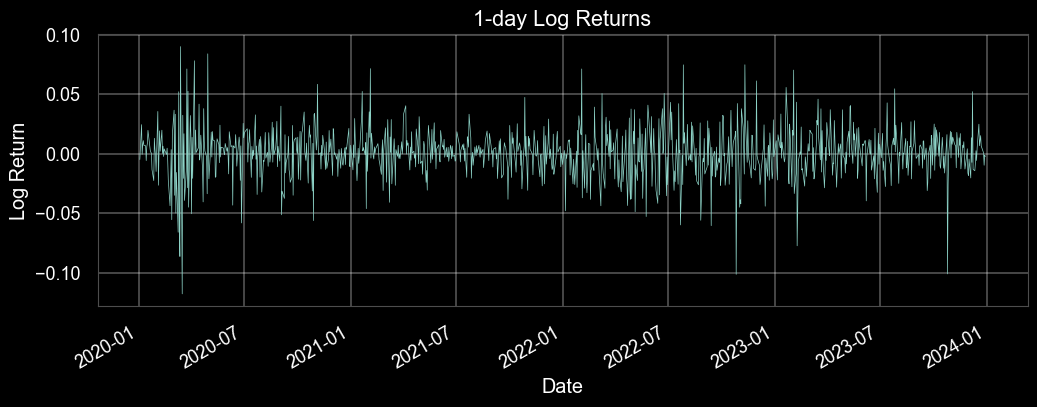

In [158]:
logret1.dropna().plot(title="1-day Log Returns", linewidth=0.5)
plt.ylabel("Log Return")

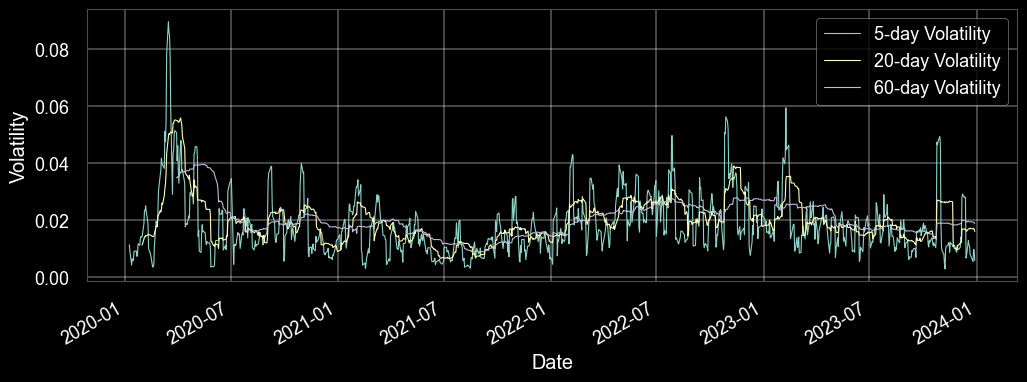

In [159]:
vol5.dropna().plot(label="5-day Volatility",linewidth=0.8)
vol20.dropna().plot(label="20-day Volatility",linewidth=0.8)
vol60.dropna().plot(label="60-day Volatility",linewidth=0.8)

plt.ylabel("Volatility")
plt.legend()

### Analysis
- The moving average acts as a "smoothened-out" version of the adjusted closing price of the asset.
- During the spike in volatility, the log return oscillated a lot between (comparatively) large values.
- Increase in volatility indicates a dip in price. This can be seen during the large spike in volatility during the price drop around 2020-03.

## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

In [160]:
asset = "GOOG"
asset_data = long_term_data[[asset]].copy()
asset_data

Ticker,GOOG
Date,
2015-01-02,25.973845
2015-01-05,25.432405
2015-01-06,24.842955
2015-01-07,24.800394
2015-01-08,24.878590
...,...
2023-12-22,141.657562
2023-12-26,141.756805
2023-12-27,140.387070


In [161]:
logret = np.log(asset_data[asset]).diff().dropna()

roll_mean20 = logret.rolling(20).mean().dropna()
roll_mean60 = logret.rolling(60).mean().dropna()
roll_mean120 = logret.rolling(120).mean().dropna()

vol20 = logret.rolling(20).std().dropna()
vol60 = logret.rolling(60).std().dropna()
vol120 = logret.rolling(120).std().dropna()

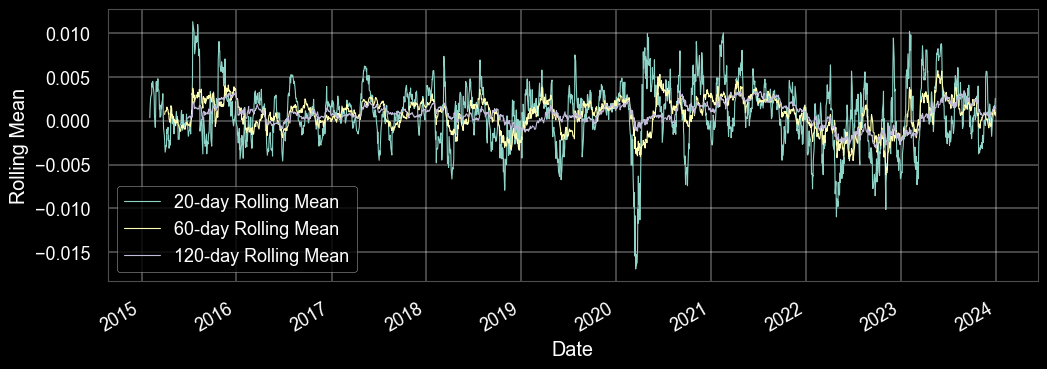

In [162]:
roll_mean20.plot(label="20-day Rolling Mean", linewidth=0.8)
roll_mean60.plot(label="60-day Rolling Mean", linewidth=0.8)
roll_mean120.plot(label="120-day Rolling Mean", linewidth=0.8)
plt.ylabel("Rolling Mean")
plt.legend()

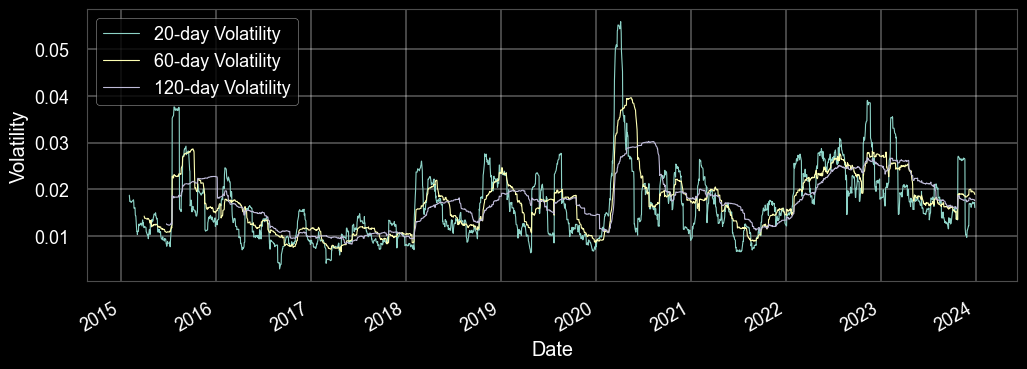

In [163]:
vol20.plot(label="20-day Volatility", linewidth=0.8)
vol60.plot(label="60-day Volatility", linewidth=0.8)
vol120.plot(label="120-day Volatility", linewidth=0.8)
plt.ylabel("Volatility")
plt.legend()

In [164]:
result = adfuller(logret)
p_val = result[1]
print(p_val)

2.905941335139741e-20


The p-value of the log-return time series is very low, indicating the null hypothesis can be rejected and the time series is stationary.

## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

In [165]:
asset = "GOOG"
#asset_data = medium_term_data.loc['2020-01':'2020-06', [asset]].copy()
asset_data = medium_term_data[[asset]].copy()
asset_data

Ticker,GOOG
Date,
2020-01-02,67.859543
2020-01-03,67.526543
2020-01-06,69.191559
2020-01-07,69.148376
2020-01-08,69.693291
...,...
2023-12-22,141.657547
2023-12-26,141.756821
2023-12-27,140.387054


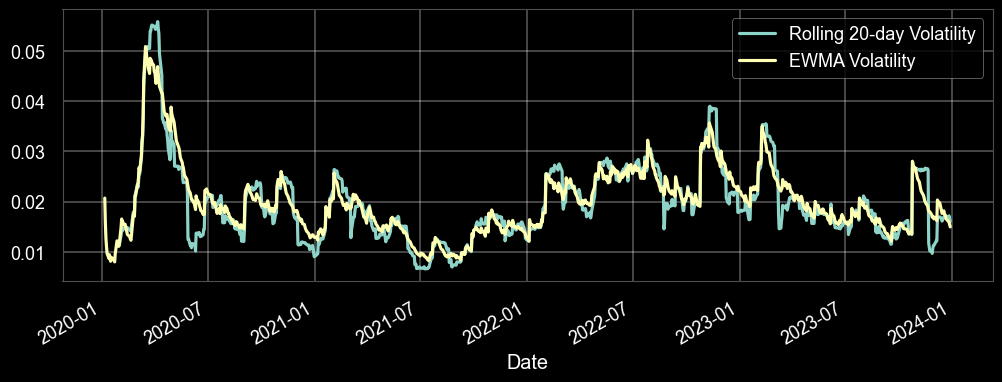

In [166]:
logret = np.log(asset_data[asset]).diff().dropna()
roll_vol20 = logret.rolling(20).std().dropna()
ewma = logret.ewm(alpha=0.06).std().dropna()

roll_vol20.plot(label="Rolling 20-day Volatility")
ewma.plot(label="EWMA Volatility")
plt.legend()

### Analysis
- The EWMA volatility estimator is smoother, while the rolling volatility has a lot of plateaus and valleys.
- The EWMA estimator reacts slightly faster than the rolling volatility estimator, however, there is no visible difference. On decreasing the decay factor $\lambda$, the slope of the EWMA estimator rises visibly before that of the rolling volatility estimator.
- It seems preferable to use the EWMA estimator for the above two reasons.

60th Percentile of EWMA Volatility Series is 0.0205


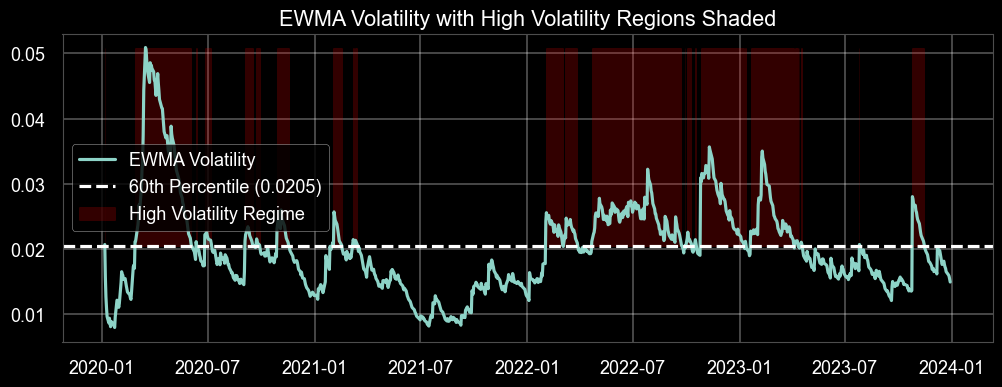

In [167]:
vol_60 = ewma.quantile(0.6) # 60th Percentile
print(f'60th Percentile of EWMA Volatility Series is {vol_60:.4f}')

plt.figure(figsize=(12, 4))

plt.plot(ewma.index, ewma, label='EWMA Volatility')

plt.axhline(y=vol_60, linestyle='--', label=f'60th Percentile ({vol_60:.4f})')

plt.fill_between(
    ewma.index,
    vol_60,
    ewma.max(),
    where=(ewma > vol_60),
    alpha=0.2,
    color='red',
    label='High Volatility Regime'
)

plt.title('EWMA Volatility with High Volatility Regions Shaded')
plt.legend()
plt.show()

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**
Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

In [168]:
asset = "NVDA"
daily_data = long_term_data[[asset]]
weekly_data = long_term_data[[asset]].resample('W').last()
monthly_data = long_term_data[[asset]].resample('ME').last()

In [169]:
logret_daily = np.log(daily_data[asset]).diff().dropna()
logret_weekly = np.log(weekly_data[asset]).diff().dropna()
logret_monthly = np.log(monthly_data[asset]).diff().dropna()

In [170]:
skew_daily = logret_daily.skew()
kurt_daily = logret_daily.kurt()

skew_weekly = logret_weekly.skew()
kurt_weekly = logret_weekly.kurt()

skew_monthly = logret_monthly.skew()
kurt_monthly = logret_monthly.kurt()


stats_summary = pd.DataFrame({
    'Daily': [skew_daily, kurt_daily],
    'Weekly': [skew_weekly, kurt_weekly],
    'Monthly': [skew_monthly, kurt_monthly]
}, index=['Skew', 'Kurtosis'])

print(stats_summary)

             Daily    Weekly   Monthly
Skew      0.210006  0.102458 -0.560449
Kurtosis  7.532088  1.391343  0.689524


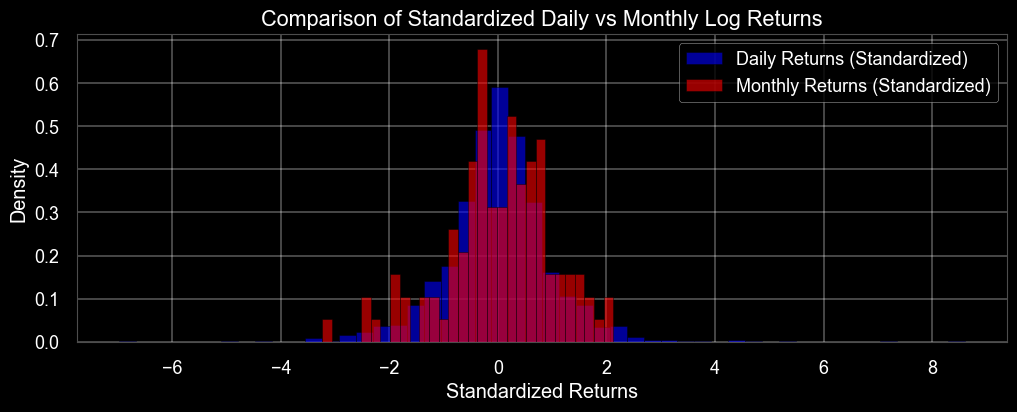

In [171]:
std_daily = (logret_daily - np.mean(logret_daily)) / np.std(logret_daily)
std_monthly = (logret_monthly - np.mean(logret_monthly)) / np.std(logret_monthly)

plt.figure(figsize=(12, 4))

plt.hist(std_daily, bins=50, alpha=0.6, label='Daily Returns (Standardized)',
         color='blue', density=True, edgecolor='black', linewidth=0.5)
plt.hist(std_monthly, bins=30, alpha=0.6, label='Monthly Returns (Standardized)',
         color='red', density=True, edgecolor='black', linewidth=0.5)

plt.xlabel('Standardized Returns')
plt.ylabel('Density')
plt.title('Comparison of Standardized Daily vs Monthly Log Returns')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [179]:
asset = "NVDA"
get_data = yf.download(asset, start="2006-12-08", auto_adjust=False)['Adj Close']
profit = 1000 * (get_data[asset]["2025-12-24"] - get_data[asset]["2006-12-08"])
print(profit // 1600)

[*********************100%***********************]  1 of 1 completed

117.0
